(array([ 71.,  71.,  83., 114.,  93., 114., 105., 106.,  87.,  81.,  75.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

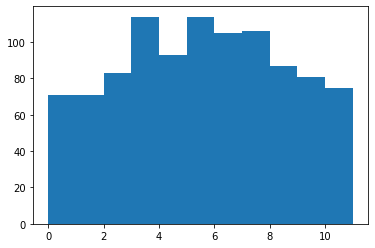

In [24]:
""" Gibbs Sampling.

@author: Damian Hoedtke
@date: June, 22nd '21

"""
from numpy.random import rand, seed
from numpy import ones
import matplotlib.pyplot as plt

# initial distribution
n = 10
seed(0)
state0 = rand(n) > 0.5

# MC step
def mc_step(state):
    
    for i, point in enumerate(state):
        
        # calculate density
        rho = sum(state) / state.size
    
        # sample probability
        a = 0.8
        p = (1.0 - a) * 0.5 + a * rho
        
        # assign new value
        state[i] = (rand(1) < p)[0]
    
nsamples = 1000
nsteps = 100

result = []

for _ in range(nsamples):
    state = rand(n) > 0.5
    
    for _ in range(nsteps):
        mc_step(state)
        
    result.append(sum(state))
    
plt.hist(result, bins=[i for i in range(n+2)])
    

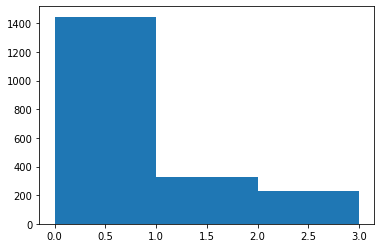

In [62]:
# initial distribution
n = 2
seed(0)
state0 = rand(n) > 0.8

# MC step
def mc_step(state):
    
    for i, point in enumerate(state):
        
        # calculate density
        if i == 0:
            rho = state[1]
        elif i==1:
            rho = state[0]
        elif i==2:
            rho = state[3]
        elif i==3:
            rho = state[2]
    
        # sample probability
        a = 0.5
        p = (1.0 - a) * 0.2 + a * rho
        
        # assign new value
        state[i] = (rand(1) < p)[0]
    
nsamples = 2000
nsteps = 50

result = []

for _ in range(nsamples):
    state = rand(n) > 0.8
    
    for _ in range(nsteps):
        mc_step(state)
        
    result.append(sum(state))
    
arr, bins, bar = plt.hist(result, bins=[i for i in range(n+2)])
    

In [63]:
arr[1] / sum(arr) + 2 * arr[2] / sum(arr)

0.392